R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

1.	Title：辨認心血管疾病之潛在危險因子 (Identify the Potential Risk Factor in Cardiovascular Disease)



2.	Aim of this study：此研究之目的在於研究會導致心血管疾病之潛在危險因子。此資料包含了抽菸、膽固醇、血糖、喝酒、運動指標等，此數種指標都是社會大眾上目前認為可能會造成心血管疾病之危險因子。而因此此資料不僅可以用來分析造成心血管疾病之重要因素究竟是主要肇因於膽固醇，又或是抽菸、喝酒還是運動有無，且也可以確認這些危險因子中實際上在此筆資料中是否其實並非心血管疾病的危險因子。而確認危險因子後便可藉此進行衛生教育，告知民眾應明確避免此危險因子，便可有效降低心血管疾病之發生率，來提升大眾的公共衛生。

3.	資料來源與簡述：The data came from kaggle, which consists of 70000 records of patients data, 11 features and target. The data structure is given by  (見project.docx)

4.	研究方法：首先先進行資料清理 (data clean) 與探索性資料分析，來避免任能可能之資料錯誤或是因資料特徵不同所導致之偏差；隨後進行相關性分析並進行比率檢定 (proportional test) ，探討有罹患心血管疾病之病患與對應之變數(抽菸、膽固醇、血糖…)是否有顯著效應，同時探討迴歸分析。



In [6]:
# ggplot2 examples
library(ggplot2) 

這是 markdown


In [7]:
#project = read.table(file.choose(),sep=";",header=TRUE)
project = read.table(file = "cardio_train.txt",sep=";",header=TRUE)

project = subset(project,project$height<=200 & project$height>=140 & 
                   project$weight>=25 & project$ap_hi<=250 & project$ap_hi>=30 &
                   project$ap_lo>=20 & project$ap_lo<=240)


project$age = round((project$age)/365,3)
project$gender = as.factor(project$gender)
project$cholesterol = as.factor(project$cholesterol)
project$gluc = as.factor(project$gluc) 
project$smoke = as.factor(project$smoke)
project$alco =  as.factor(project$alco)
project$active = as.factor(project$active)
project$cardio = as.factor(project$cardio)
colnames(project) = c("id","Age","Gender","Height","Weight","SBP","DBP","Cholesterol","Glucose","Smoke","Alcohol","Exercise","Disease")

The Following are plots about ages 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



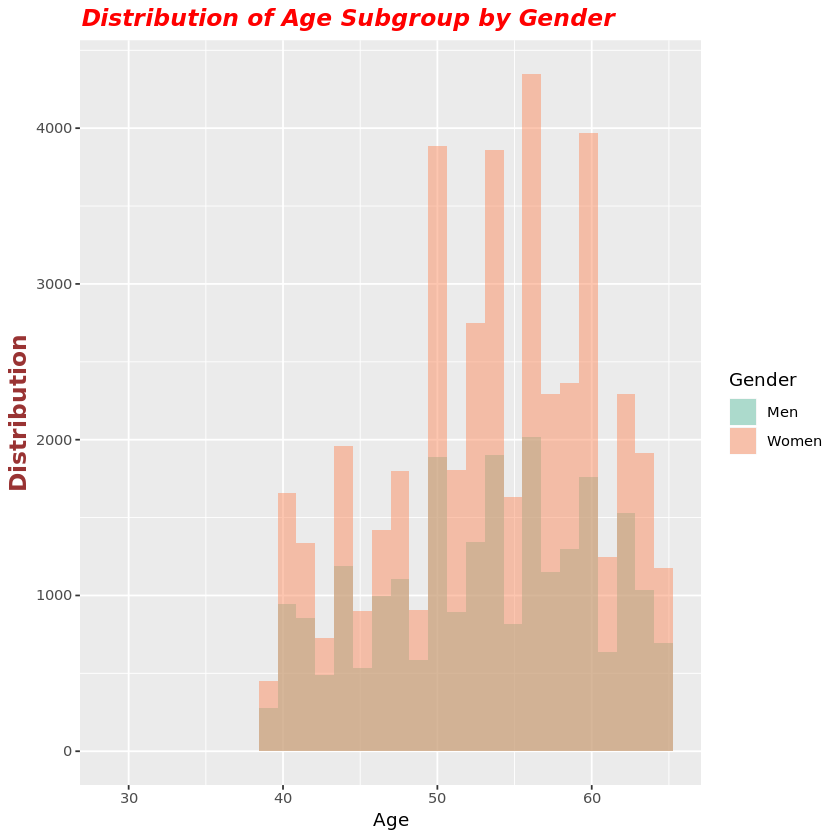

In [31]:
ggplot(project, aes(x=Age, fill=Gender)) +
  geom_histogram(position="identity", alpha=0.5)+
  ggtitle("Distribution of Age Subgroup by Gender") +
  xlab("Age") + 
  ylab("Distribution")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))+
  scale_x_continuous("Age")


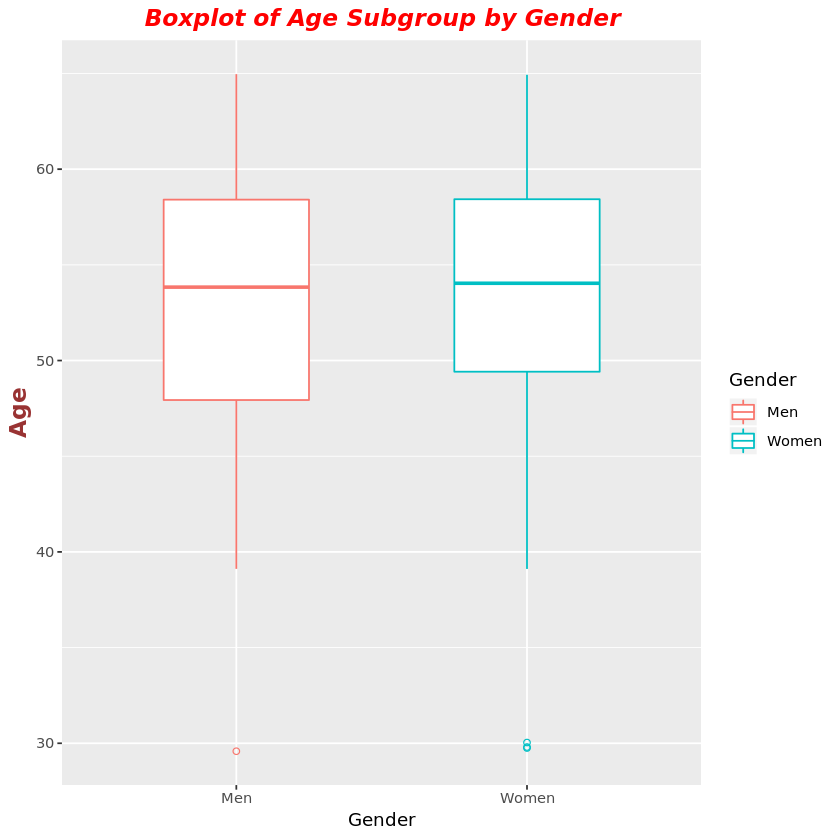

In [32]:
ggplot(project,aes(x=Gender,y=Age,colour=Gender))+
  geom_boxplot(width=.5,outlier.shape = 1)+
  labs(title="Box plot of meanspeed")+
  theme(plot.title=element_text(hjust = 0.5,face="bold",size=15))+
  ggtitle("Boxplot of Age Subgroup by Gender") +
  xlab("Gender") + 
  ylab("Age")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))

由上三圖可知，年齡整體由圖形而言還算呈現常態分佈，且由圖形與 Five-number summary來看，並無因男女分組而有所差異

In [ ]:
The following are plots about Height

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



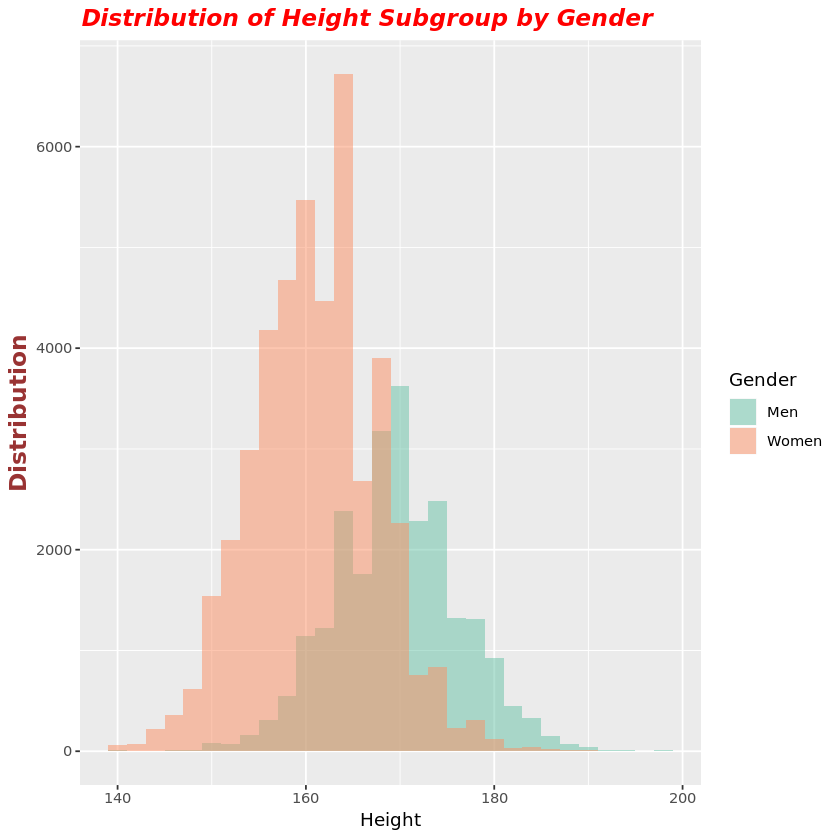

In [29]:
ggplot(project, aes(x=Height, fill=Gender)) +
  geom_histogram(position="identity", alpha=0.5)+
  ggtitle("Distribution of Height Subgroup by Gender") +
  xlab("Height") + 
  ylab("Distribution")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))+
  scale_x_continuous("Height")

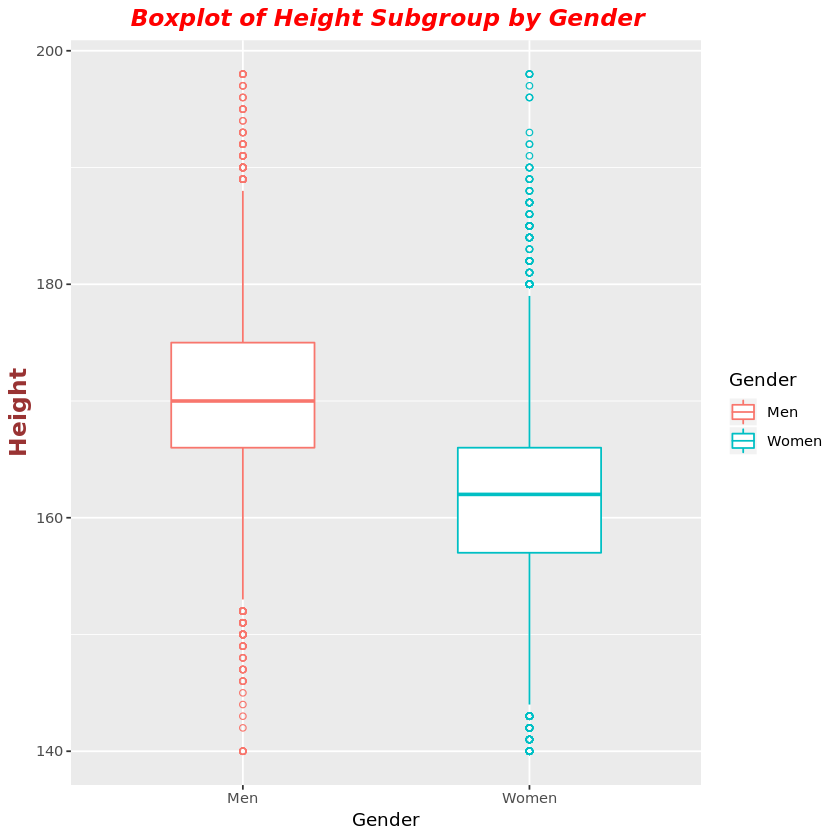

In [30]:
ggplot(project,aes(x=Gender,y=Height,colour=Gender))+
  geom_boxplot(width=.5,outlier.shape = 1)+
  labs(title="Box plot of meanspeed")+
  theme(plot.title=element_text(hjust = 0.5,face="bold",size=15))+
  ggtitle("Boxplot of Height Subgroup by Gender") +
  xlab("Gender") + 
  ylab("Height")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))


身高整體由圖形而言還算呈現常態分佈，且由圖形與 Five-number summary來看，男生明顯偏高，這也合乎常理。

The following are plots about weight 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



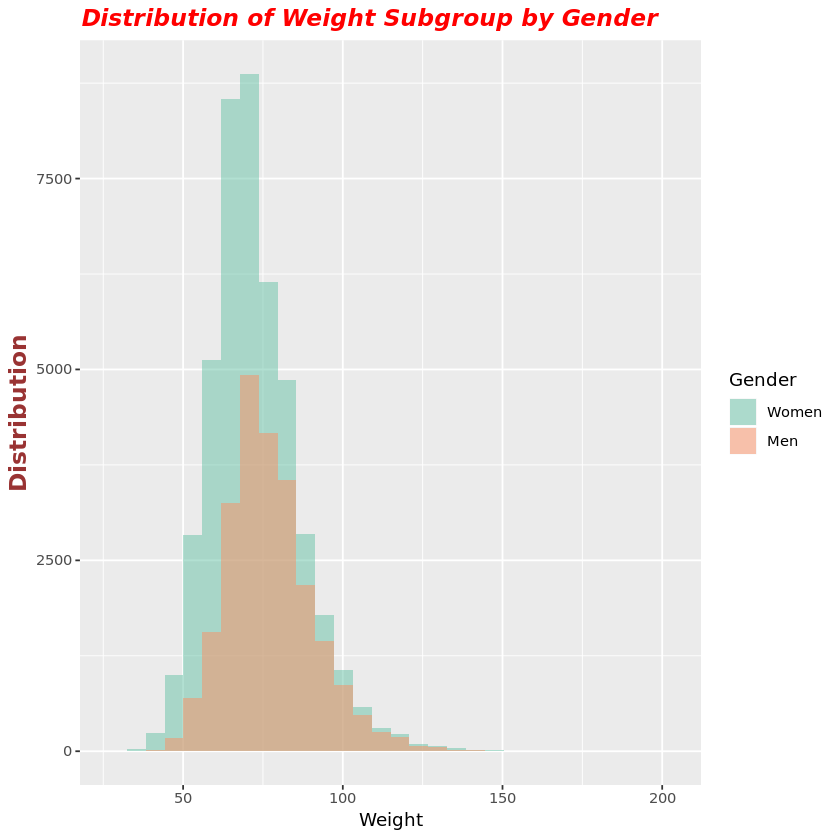

In [27]:
project = rowdata

ggplot(project, aes(x=Weight, fill=Gender)) +
  geom_histogram(position="identity", alpha=0.5)+
  ggtitle("Distribution of Weight Subgroup by Gender") +
  xlab("Weight") + 
  ylab("Distribution")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))+
  scale_x_continuous("Weight")

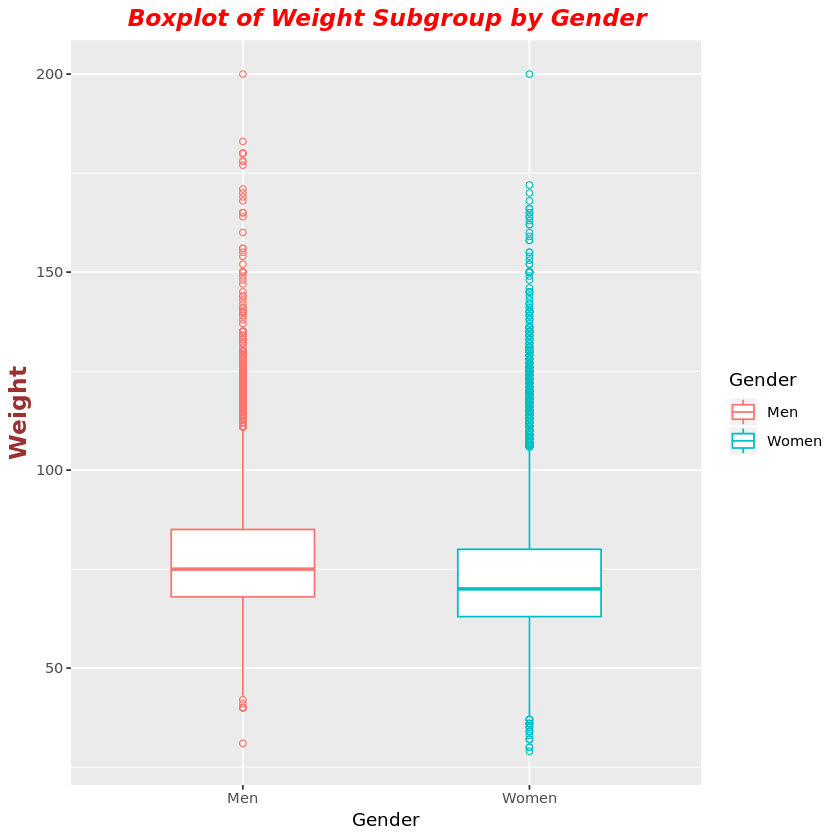

In [28]:
project$Gender= ifelse(project$Gender=="1","Women","Men")
ggplot(project,aes(x=Gender,y=Weight,colour=Gender))+
  geom_boxplot(width=.5,outlier.shape = 1)+
  labs(title="Box plot of meanspeed")+
  theme(plot.title=element_text(hjust = 0.5,face="bold",size=15))+
  ggtitle("Boxplot of Weight Subgroup by Gender") +
  xlab("Gender") + 
  ylab("Weight")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))

體重整體由圖形而言還算呈現常態分佈，且由圖形與 Five-number summary來看，男生明顯偏高，這也合乎常理。

The following are distribution of gender.

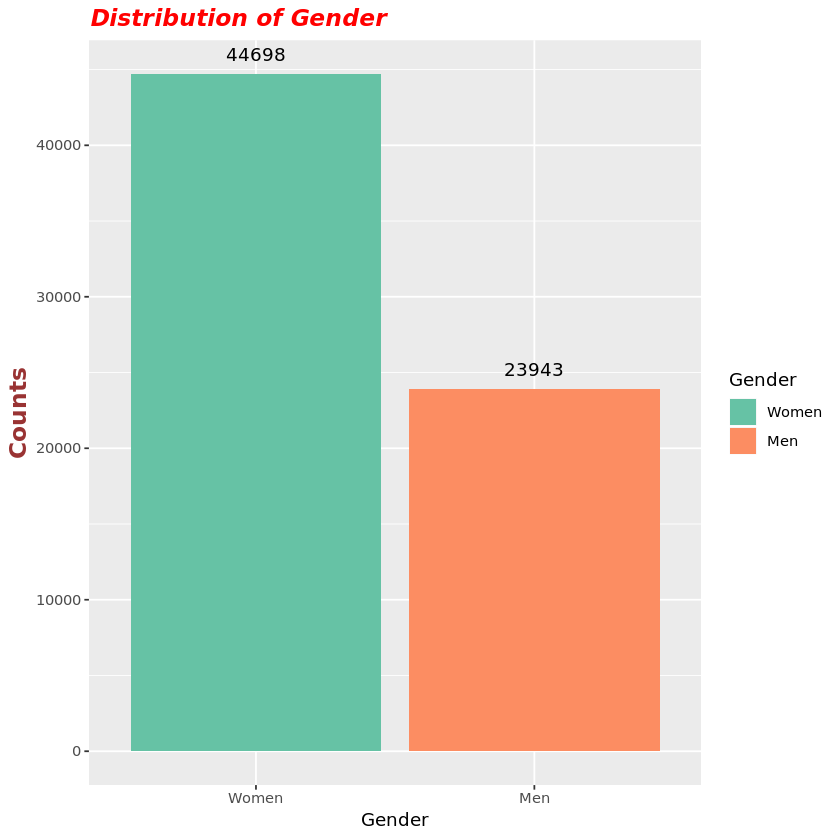

In [8]:
ggplot(data=project, aes(x=Gender,fill=Gender)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Gender") +
  xlab("Gender") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))+
  scale_x_discrete("Gender",labels=c("1" = "Women","2"="Men"))

因此可發現在此筆樣本中，大部分為女性樣本(佔65%)，男性樣本則為35%，因此分析時須小心性別樣本差異所帶來的偏差問題。

The following are plots about Systolic Blood Pressure (S.B.P.)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



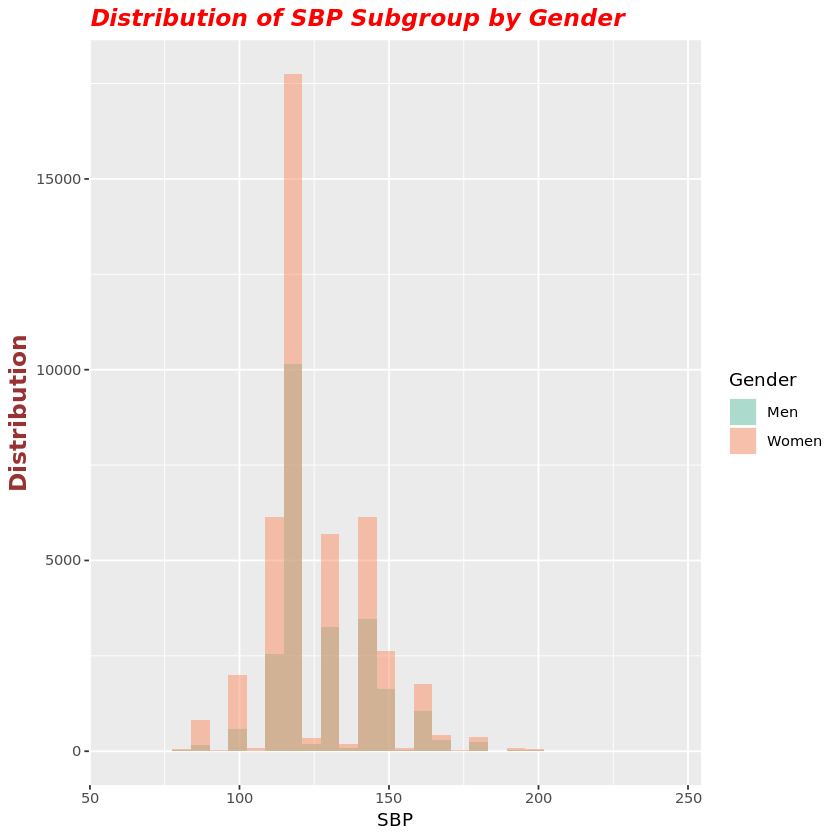

In [33]:
ggplot(project, aes(x=SBP, fill=Gender)) +
  geom_histogram(position="identity", alpha=0.5)+
  ggtitle("Distribution of SBP Subgroup by Gender") +
  xlab("SBP") + 
  ylab("Distribution")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))+
  scale_x_continuous("SBP")

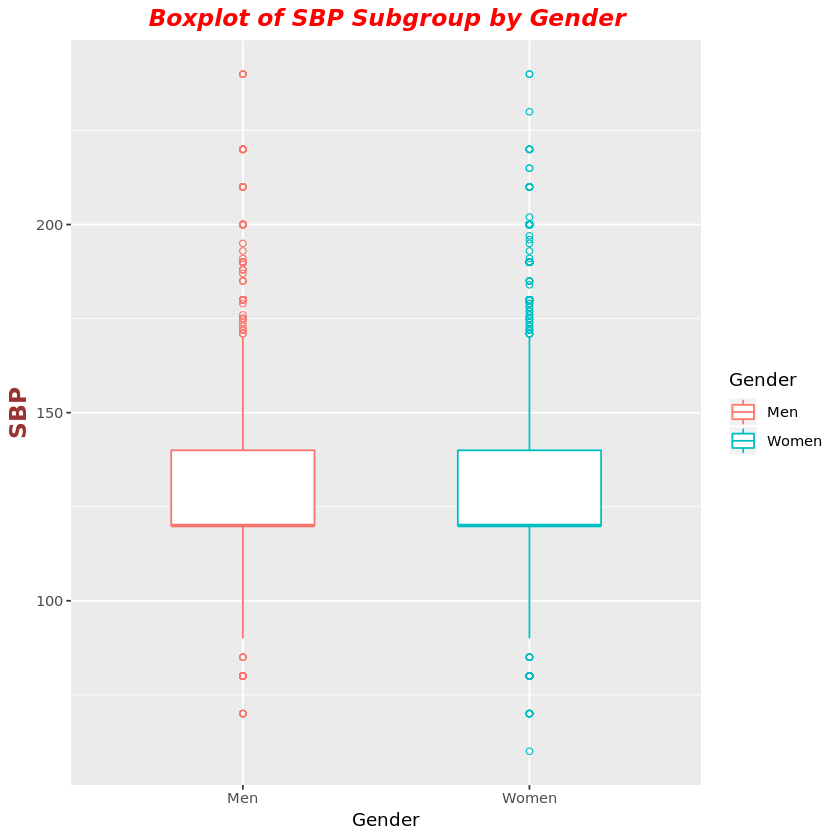

In [34]:
ggplot(project,aes(x=Gender,y=SBP,colour=Gender))+
  geom_boxplot(width=.5,outlier.shape = 1)+
  labs(title="Box plot of meanspeed")+
  theme(plot.title=element_text(hjust = 0.5,face="bold",size=15))+
  ggtitle("Boxplot of SBP Subgroup by Gender") +
  xlab("Gender") + 
  ylab("SBP")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))

S.B.P. 整體由圖形而言為偏高狹峰分配，不一定為常態，且由圖形與 Five-number summary來看，男女生無明顯差異。


The following are plots about Diastolic Blood Pressure (D.B.P.)

In [ ]:
D.B.P. 與 S.B.P. 有類似之情形，因此僅考慮 20<=D.B.P.<=240進行分析。

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



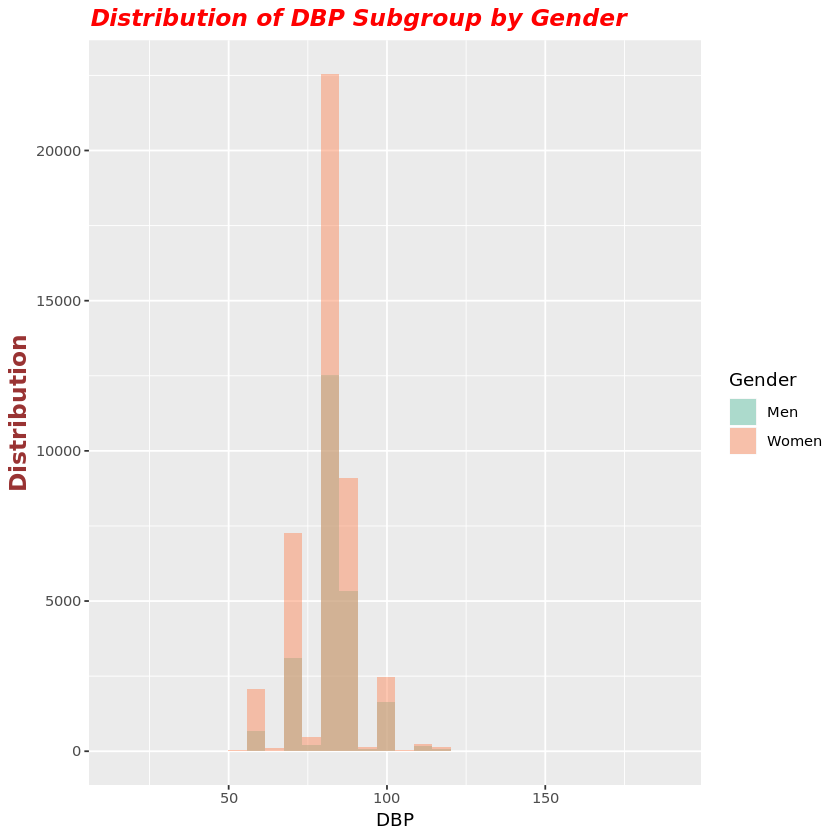

In [35]:
ggplot(project, aes(x=DBP, fill=Gender)) +
  geom_histogram(position="identity", alpha=0.5)+
  ggtitle("Distribution of DBP Subgroup by Gender") +
  xlab("DBP") + 
  ylab("Distribution")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))+
  scale_x_continuous("DBP")

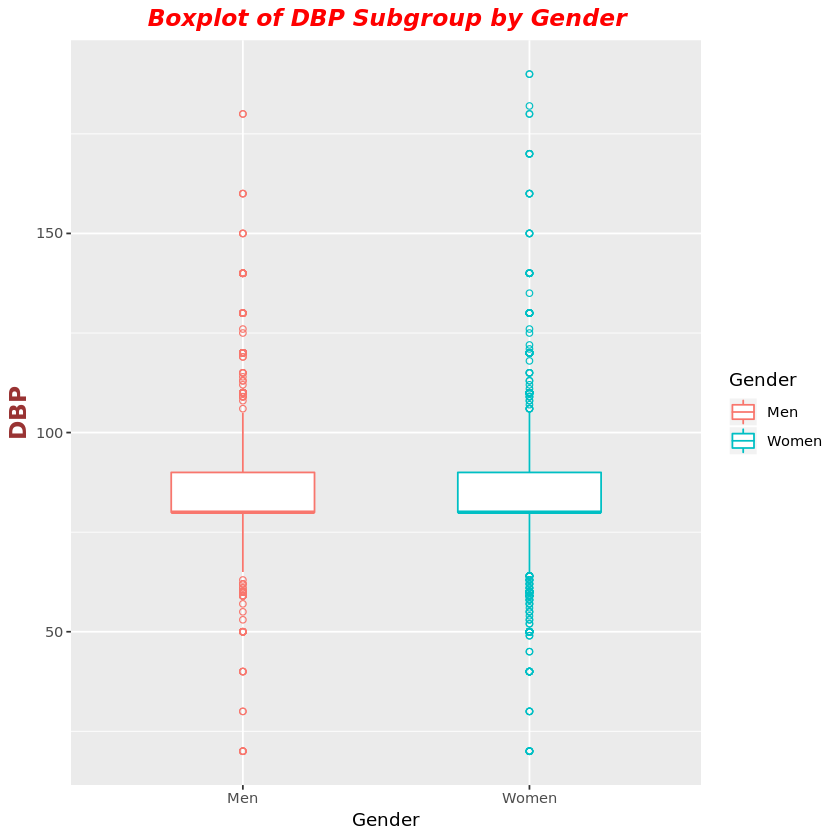

In [36]:
ggplot(project,aes(x=Gender,y=DBP,colour=Gender))+
  geom_boxplot(width=.5,outlier.shape = 1)+
  labs(title="Box plot of meanspeed")+
  theme(plot.title=element_text(hjust = 0.5,face="bold",size=15))+
  ggtitle("Boxplot of DBP Subgroup by Gender") +
  xlab("Gender") + 
  ylab("DBP")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1"="Women","2"="Men"))


D.B.P. 整體由圖形而言也為偏高狹峰分配，不一定為常態，且由圖形與 Five-number summary來看，男女生無明顯差異。

Cholesterol (1-normal, 2-above normal, 3-well above normal)

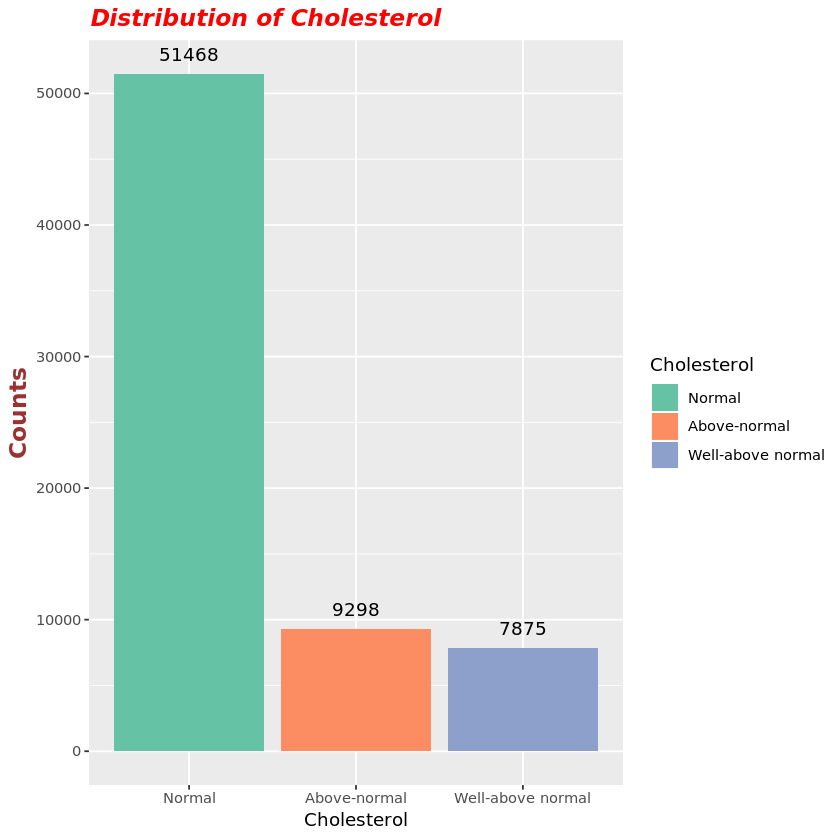

In [9]:
ggplot(data=project, aes(x=Cholesterol,fill=Cholesterol)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Cholesterol") +
  xlab("Cholesterol") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))+
  scale_x_discrete("Cholesterol",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))

由上圖可發現，原則上大部分人是處於膽固醇正常之狀況。

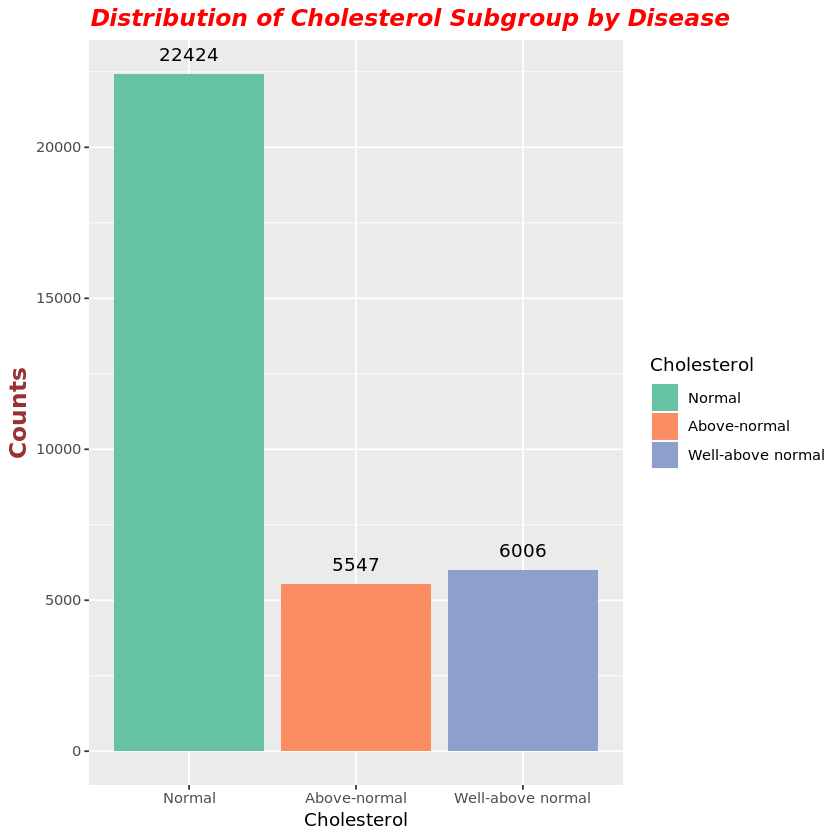

In [10]:
rowdata=project
project = subset(project,project$Disease==1)
ggplot(data=project, aes(x=Cholesterol,fill=Cholesterol)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Cholesterol Subgroup by Disease") +
  xlab("Cholesterol") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))+
  scale_x_discrete("Cholesterol",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))

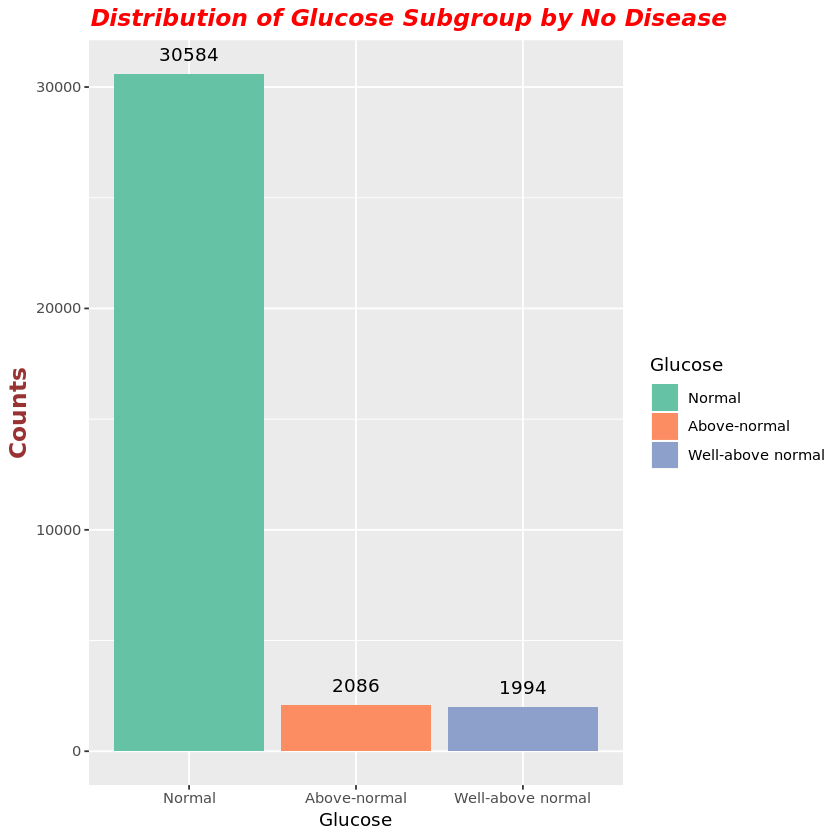

In [13]:
project = rowdata
project = subset(project,project$Disease==0)
ggplot(data=project, aes(x=Glucose,fill=Glucose)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Glucose Subgroup by No Disease") +
  xlab("Glucose") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))+
  scale_x_discrete("Glucose",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))

由上兩圖可發現，若以是否有心血管疾病進行分群分析，可注意到血糖Well-above normal的人中其有疾病的比例高達 3231/(3231+1994)=61%，因此其實不是太偏高的數直，而在於血糖正常的群體中則幾乎一半一半，Above normal中則佔 2981/(2981+2086)=58%，跟Well-above the normal 相差無幾，因此在進行統計分析前可預期血糖可能較(至少相較於膽固醇)不容易判定為是導致心血管疾病的危險因子。

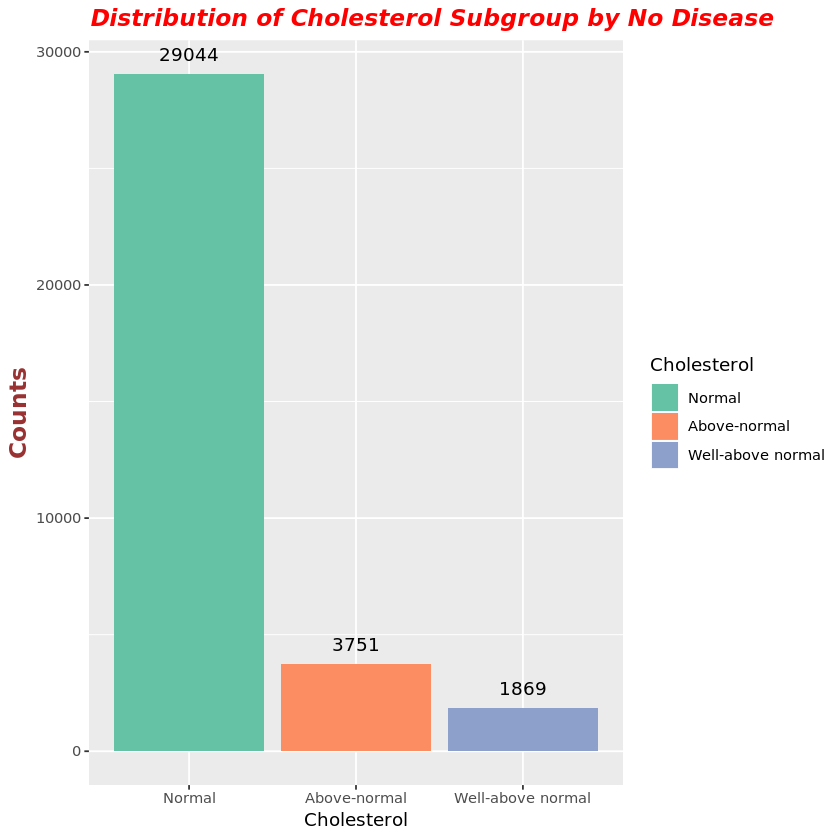

In [11]:
project = rowdata
project = subset(project,project$Disease==0)
ggplot(data=project, aes(x=Cholesterol,fill=Cholesterol)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Cholesterol Subgroup by No Disease") +
  xlab("Cholesterol") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))+
  scale_x_discrete("Cholesterol",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))

由上兩圖可發現，若以是否有心血管疾病進行分群分析，可注意到膽固醇Well-above normal的人中其有疾病的比例高達 6006/(6006+1869) = 75%，因此確實膽固醇此變數在判定是否有疾病應可以具有一定的統計分析性，而在於膽固醇正常的群體中則幾乎一半一半，Above normal中則也是有病者偏高，因此在進行統計分析前可預期Well-above normal可能會是導致心血管疾病的危險因子。

(8)Glucose (1-normal, 2-above normal, 3-well above normal)

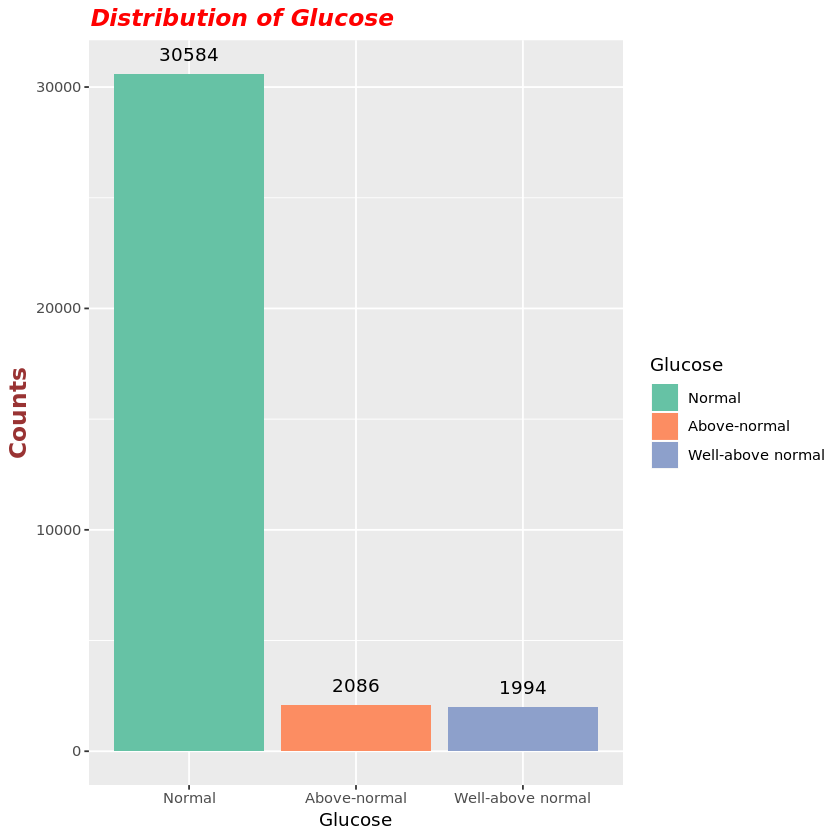

In [12]:
ggplot(data=project, aes(x=Glucose,fill=Glucose)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Glucose") +
  xlab("Glucose") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))+
  scale_x_discrete("Glucose",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))

由上圖可發現，原則上大部分人是處於Glucose正常之狀況。

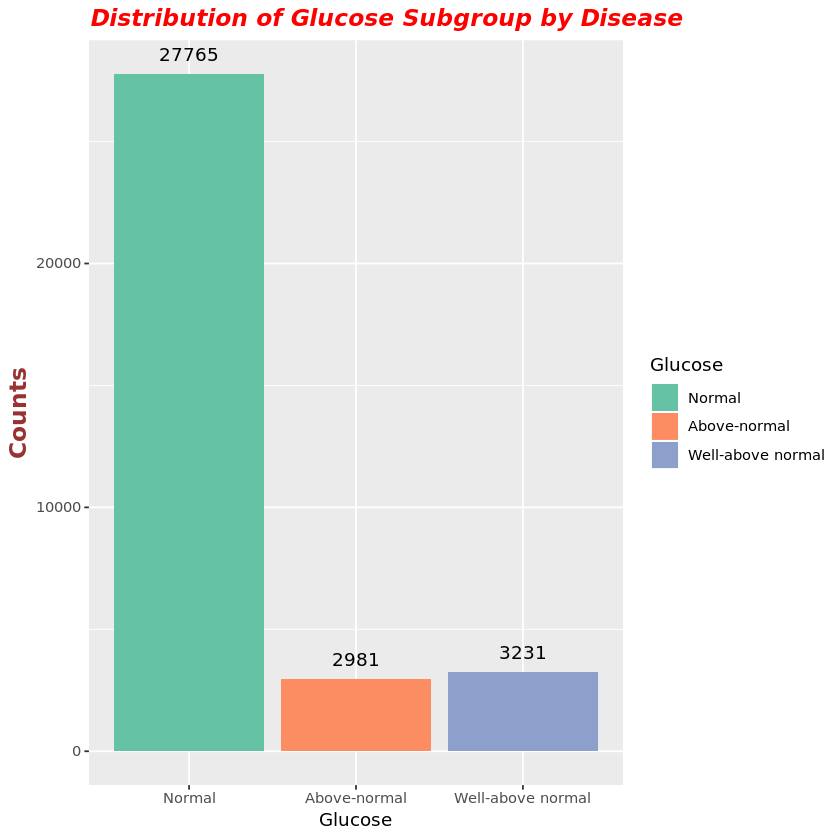

In [14]:
project = rowdata
project = subset(project,project$Disease==1)
ggplot(data=project, aes(x=Glucose,fill=Glucose)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Glucose Subgroup by Disease") +
  xlab("Glucose") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))+
  scale_x_discrete("Glucose",labels=c("1" = "Normal","2"="Above-normal","3"="Well-above normal"))

(9)	Smoking (0-no, 1-yes)

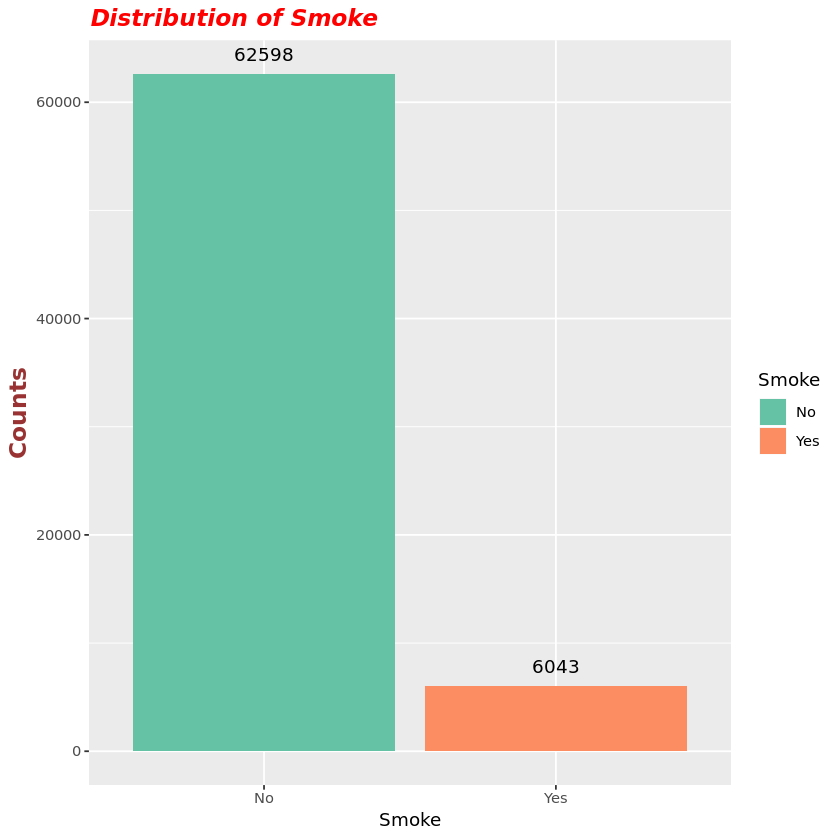

In [15]:
project = rowdata
ggplot(data=project, aes(x=Smoke,fill=Smoke)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Smoke") +
  xlab("Smoke") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Smoke",labels=c("0"="No","1"="Yes"))


In [ ]:
由上圖可發現，原則上大部分人是處於不抽菸之狀況。

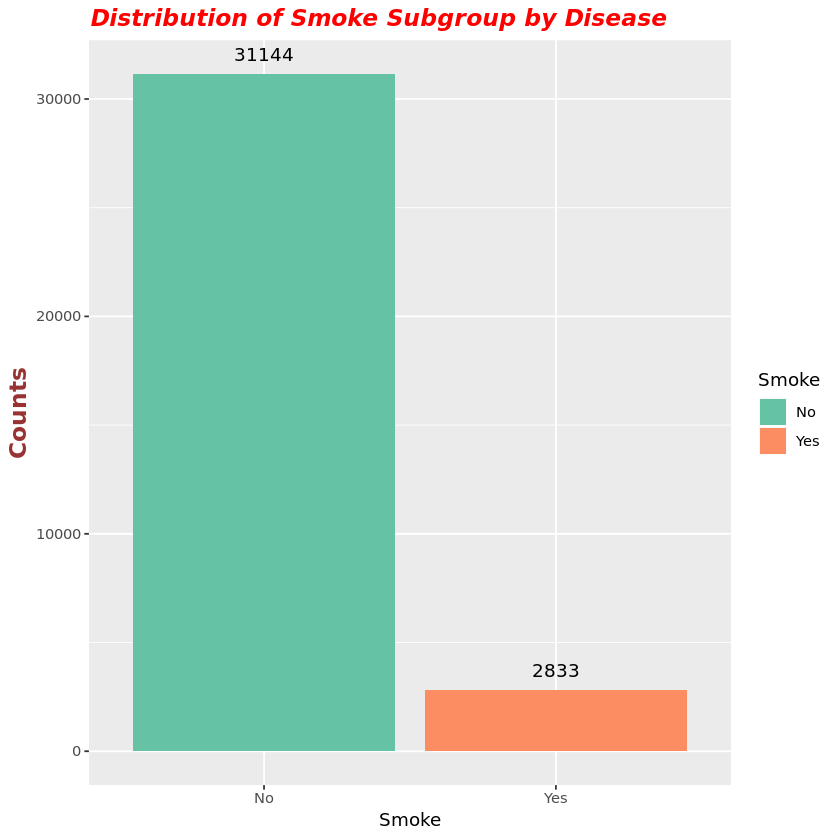

In [17]:
project = rowdata
project = subset(project,project$Disease==1)
ggplot(data=project, aes(x=Smoke,fill=Smoke)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Smoke Subgroup by Disease") +
  xlab("Smoke") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Smoke",labels=c("0"="No","1"="Yes"))


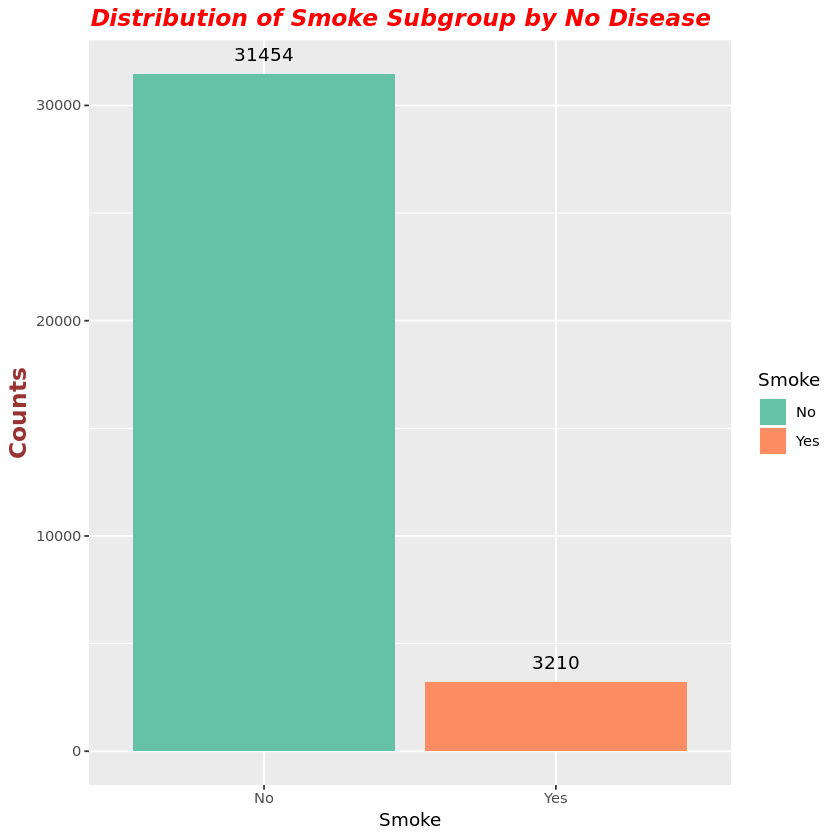

In [16]:
project = rowdata
project = subset(project,project$Disease==0)
ggplot(data=project, aes(x=Smoke,fill=Smoke)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Smoke Subgroup by No Disease") +
  xlab("Smoke") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Smoke",labels=c("0"="No","1"="Yes"))


由上兩圖可發現，若以是否有心血管疾病進行分群分析，實際上在抽菸族群中，反而不抽菸者得到心血管疾病之比率以圖形來看可能較高(但尚未進行統計分析)，因此實際上可預期抽菸可能反而不會是心血管疾病的危險因子。

Alcohol intake (0-no, 1-yes)

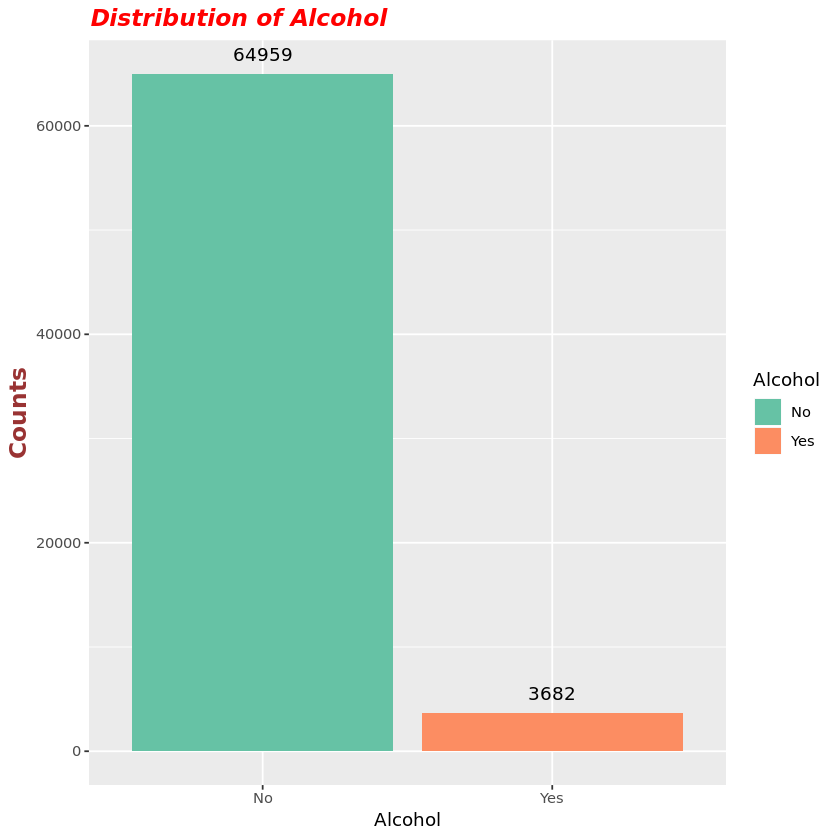

In [18]:
project = rowdata
ggplot(data=project, aes(x=Alcohol,fill=Alcohol)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Alcohol") +
  xlab("Alcohol") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Alcohol",labels=c("0"="No","1"="Yes"))


由上圖可發現，原則上大部分人是處於不喝酒之狀況。

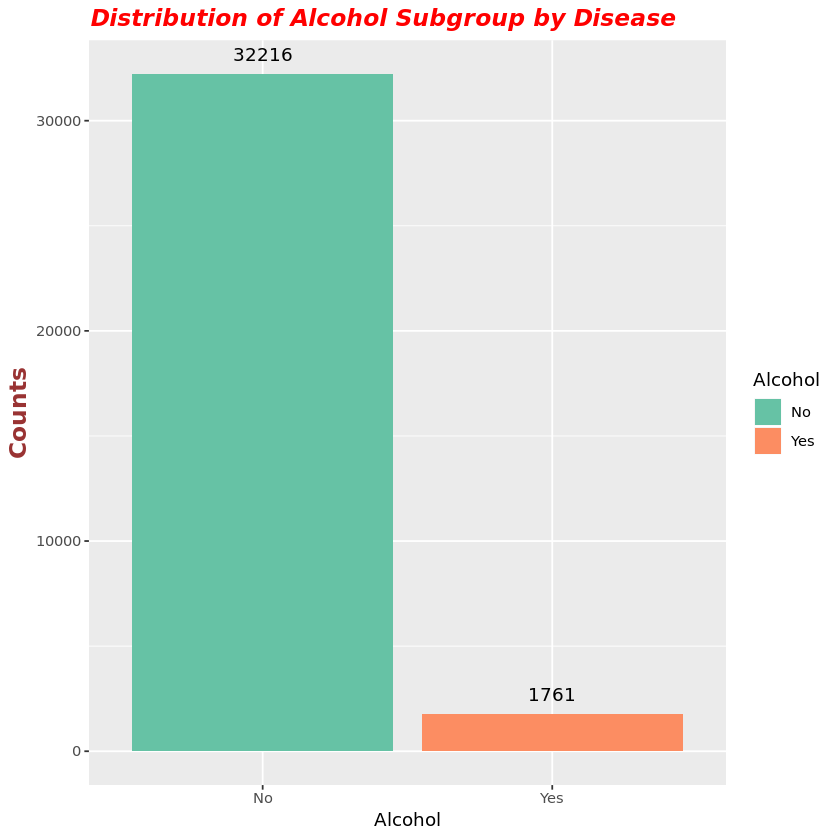

In [20]:
project = rowdata
project = subset(project,project$Disease==1)
ggplot(data=project, aes(x=Alcohol,fill=Alcohol)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Alcohol Subgroup by Disease") +
  xlab("Alcohol") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Alcohol",labels=c("0"="No","1"="Yes"))



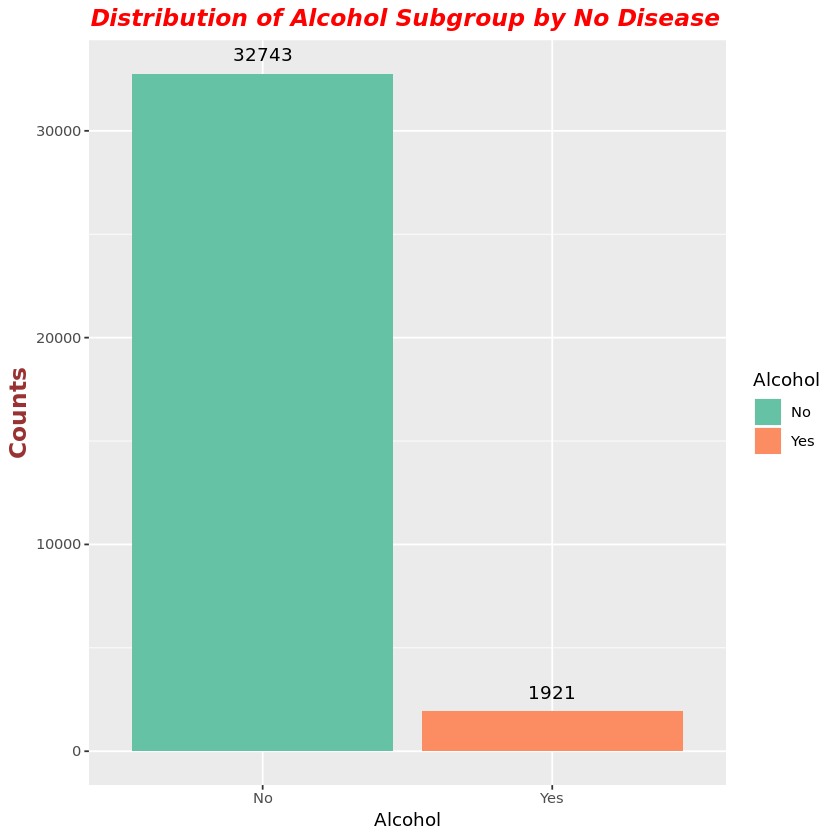

In [19]:
project = rowdata
project = subset(project,project$Disease==0)
ggplot(data=project, aes(x=Alcohol,fill=Alcohol)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Alcohol Subgroup by No Disease") +
  xlab("Alcohol") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Alcohol",labels=c("0"="No","1"="Yes"))

由上兩圖可發現，若以是否有心血管疾病進行分群分析，實際上在喝酒與不喝酒族群中其得心血管疾病之比率也相差無幾，因此實際上可預期喝酒可能也不會是心血管疾病的危險因子。

Physical activity (0-no, 1-yes)

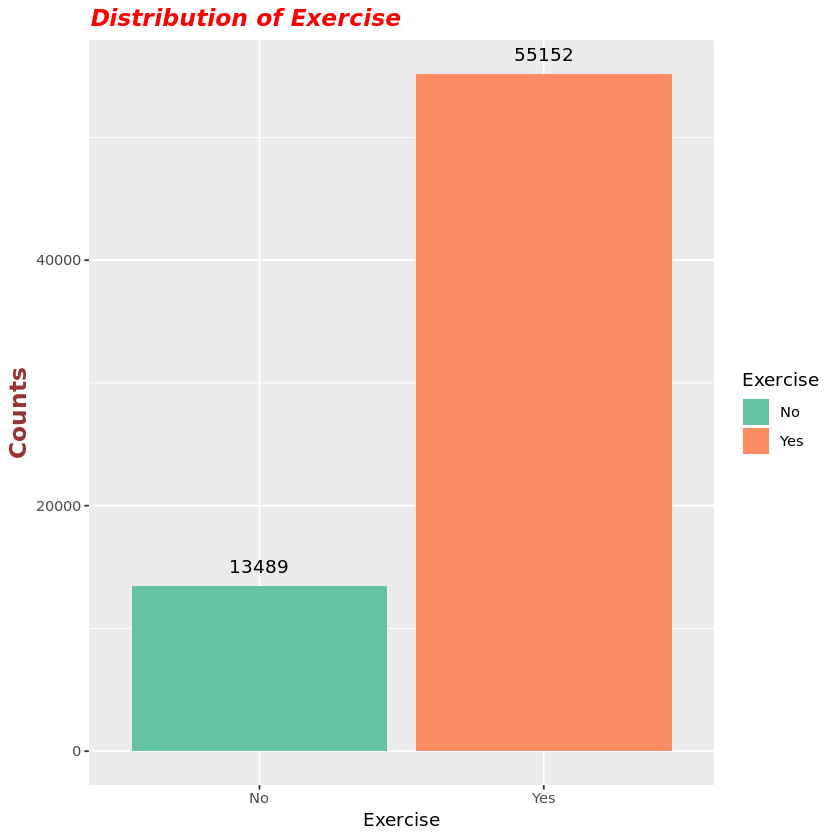

In [21]:
project = rowdata
ggplot(data=project, aes(x=Exercise,fill=Exercise)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Exercise") +
  xlab("Exercise") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Exercise",labels=c("0"="No","1"="Yes"))

由上圖可發現，原則上大部分人是處於會有運動活動之狀況。

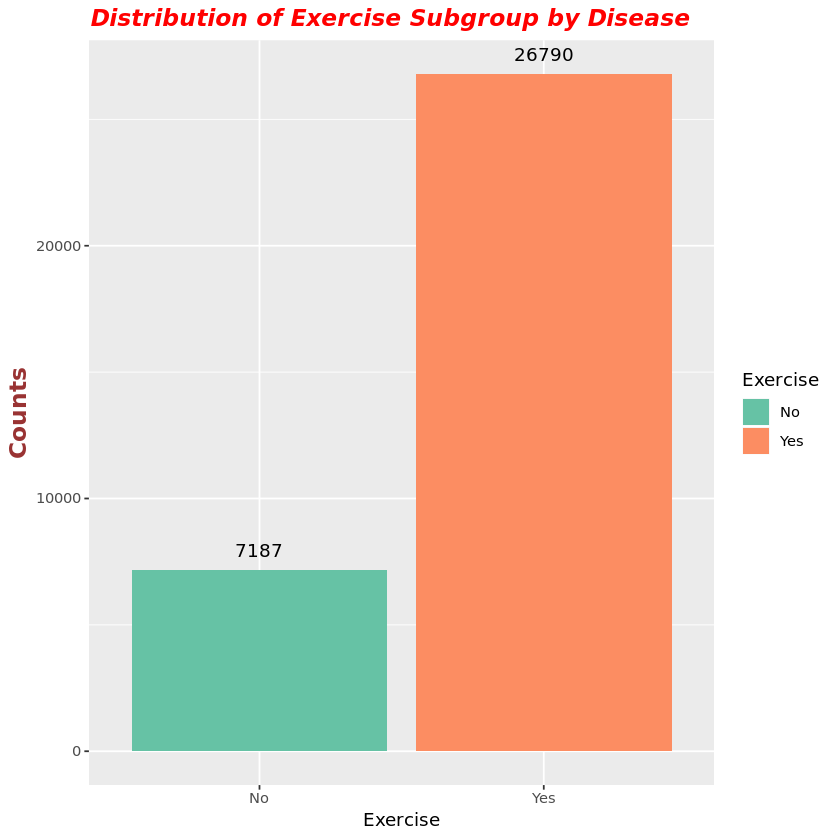

In [23]:
project = rowdata
project = subset(project,project$Disease==1)
ggplot(data=project, aes(x=Exercise,fill=Exercise)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Exercise Subgroup by Disease") +
  xlab("Exercise") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Exercise",labels=c("0"="No","1"="Yes"))


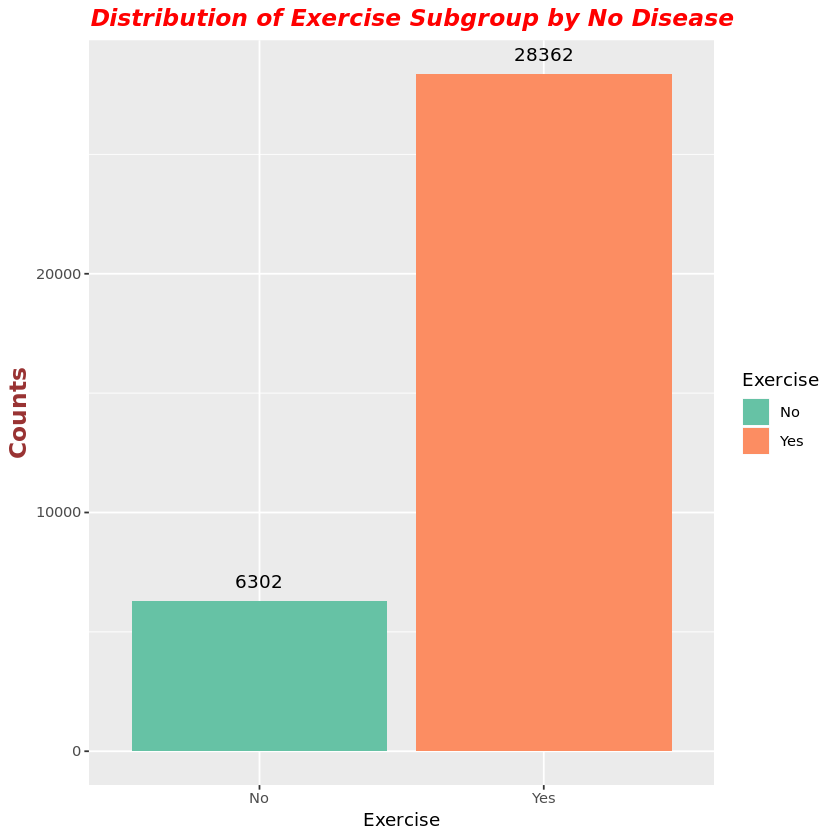

In [22]:
project = rowdata
project = subset(project,project$Disease==0)
ggplot(data=project, aes(x=Exercise,fill=Exercise)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Exercise Subgroup by No Disease") +
  xlab("Exercise") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Exercise",labels=c("0"="No","1"="Yes"))

由上兩圖可發現，若以是否有心血管疾病進行分群分析，實際上兩群體機率幾乎都是一半一半，因此實際上可預期運動習慣可能反而不會是心血管疾病的危險因子。

Presence or absence of cardiovascular disease (0-no, 1-yes)

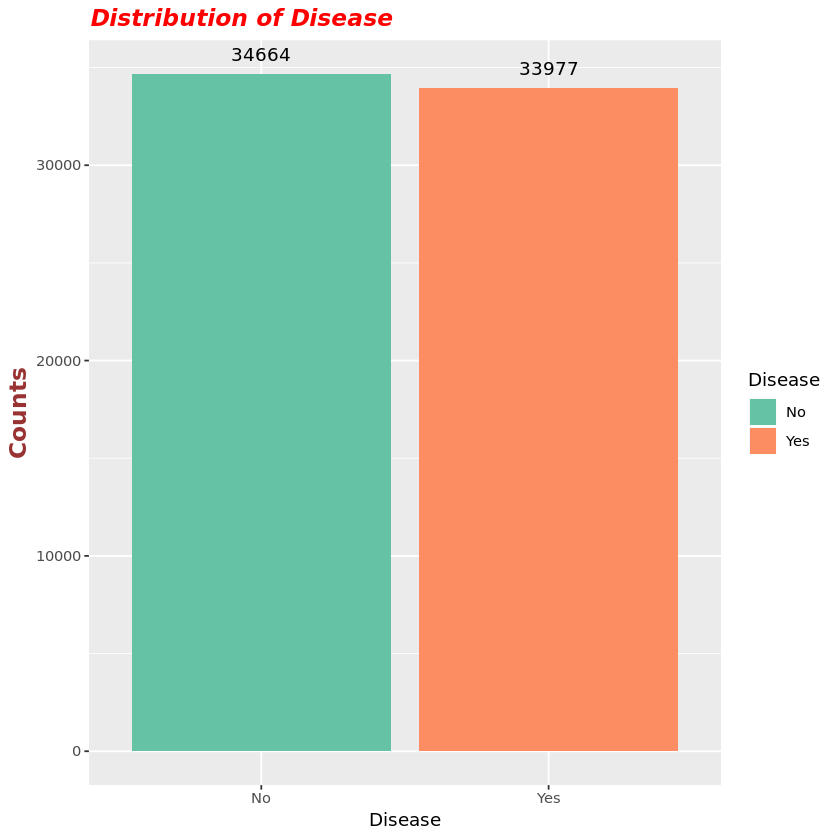

In [24]:
project = rowdata
ggplot(data=project, aes(x=Disease,fill=Disease)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Disease") +
  xlab("Disease") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Disease",labels=c("0"="No","1"="Yes"))

由上圖可見，此筆資料對於有或沒有心血管疾病之人處於一半一半之情況，此情況有利於進行後續的統計分析，可減少因樣本差異造成之偏差。

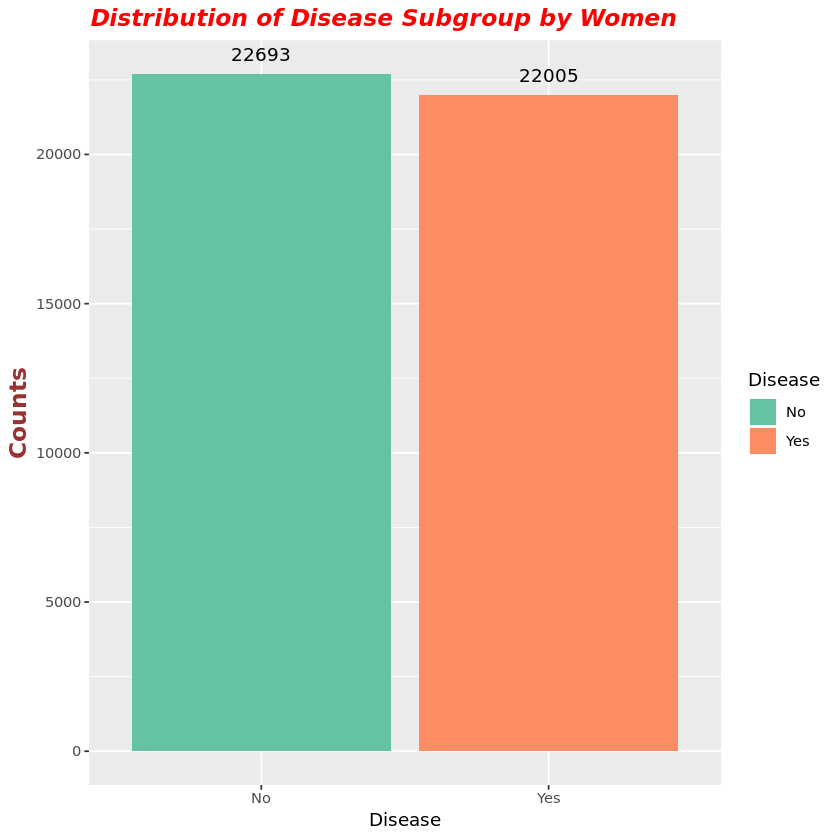

In [25]:
project = rowdata
project = subset(project,project$Gender==1)
ggplot(data=project, aes(x=Disease,fill=Disease)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Disease Subgroup by Women") +
  xlab("Disease") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Disease",labels=c("0"="No","1"="Yes"))

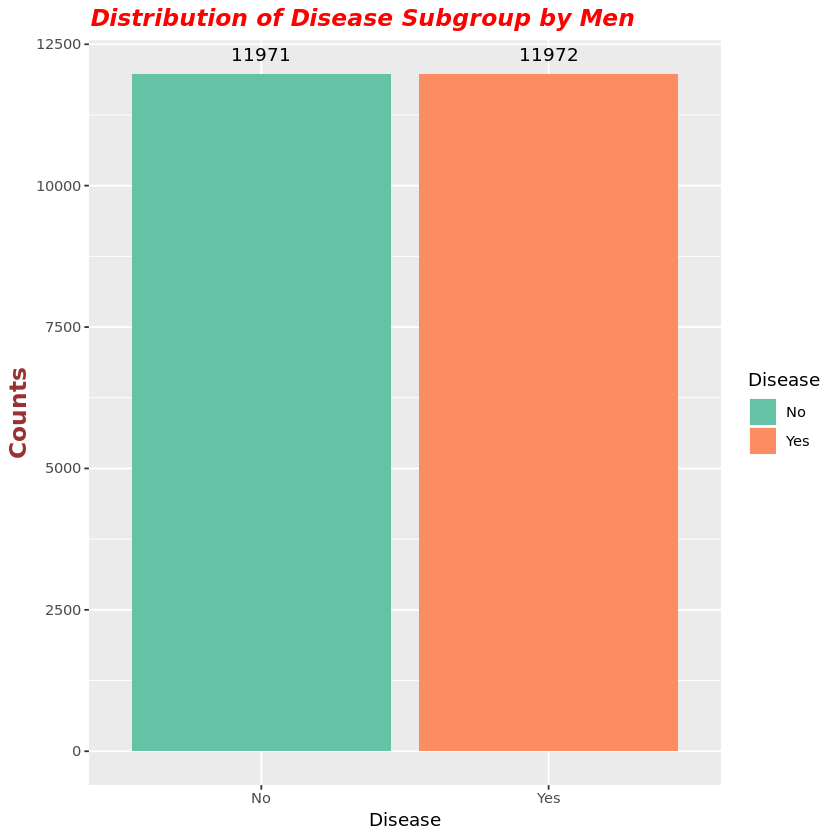

In [26]:
project = rowdata
project = subset(project,project$Gender==2)
ggplot(data=project, aes(x=Disease,fill=Disease)) +
  geom_bar(position = "dodge") +
  geom_text(stat='count', aes(label=..count..), vjust=-1)+
  ggtitle("Distribution of Disease Subgroup by Men") +
  xlab("Disease") + 
  ylab("Counts")+
  theme(
    plot.title = element_text(color="red", size=14, face="bold.italic"),
    axis.title.y = element_text(color="#993333", size=14, face="bold"))+
  scale_fill_brewer(palette = "Set2",labels=c("0"="No","1"="Yes"))+
  scale_x_discrete("Disease",labels=c("0"="No","1"="Yes"))

Conclusion on E.D.A.：僅分析身高140~200,體重>=25、30<=S.B.P<=250,　20<=D.B.P.<=240之樣本外，也須注意因性別樣本差異差異所導致之分析偏差，並且預期上相較於其他變數，膽固醇較可作為心血管疾病重要之危險因子，而實際上抽菸、運動、酗酒可能實際上並非心血管之危險因子。